In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fc_sim.toymodel import *
from fc_sim.fun import *
from fc_sim.camera import camera_description

In [5]:
subarray = get_fc_subarray()

# NSB

In [10]:
# Waveforms of random charge produced at the centre of the trace

waveform, subarray, tel_id, selected_gain_channel, charge, time = get_random_toy_waveforms(subarray, minCharge=100, maxCharge=1000, n_samples=128)


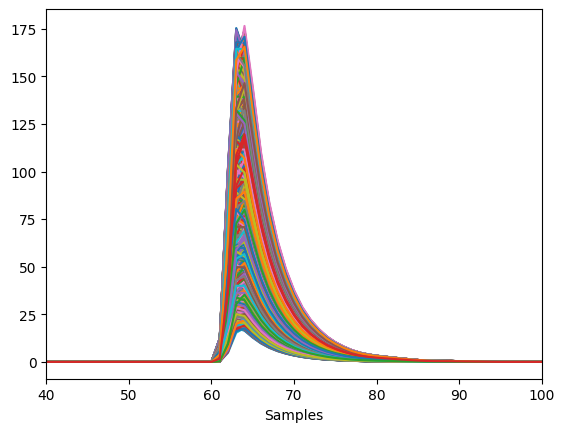

In [11]:
plt.figure()

plt.plot(waveform.T)

plt.xlim(40, 100)
plt.xlabel("Samples")
plt.show()

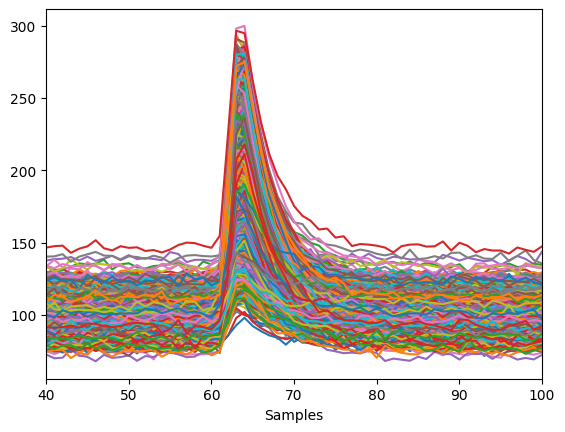

In [12]:
nsb_waveform = waveform + simulate_nsb(200, 2, no_baseline=False)

plt.figure()

plt.plot(nsb_waveform.T)

plt.xlim(40, 100)
plt.xlabel("Samples")
plt.show()

# Gaussian noise


In [13]:
noisy_waveform = GaussianNoise().add_to_readout(waveform)

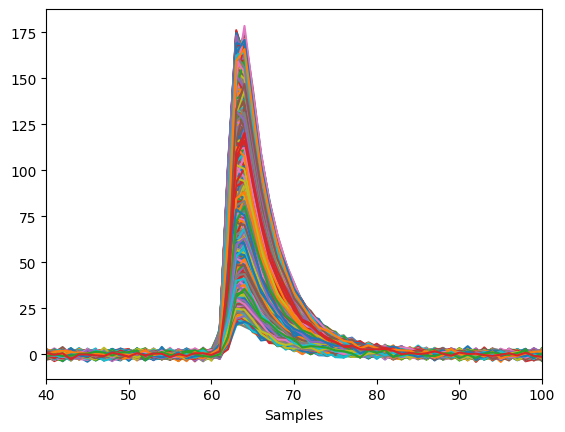

In [14]:
plt.figure()

plt.plot(noisy_waveform.T)

plt.xlim(40, 100)
plt.xlabel("Samples")
plt.show()

# Noise from template

In [6]:
np.reshape(np.random.normal(0, 2, 1764*128), (128, 1764))

array([[-0.32105045, -0.97799973, -4.29704018, ...,  1.9919352 ,
        -4.14468583, -0.43234129],
       [-2.16364909,  0.0285233 ,  0.44783851, ..., -0.11739121,
        -1.87607257, -1.74554707],
       [-0.79237035, -2.58908589, -1.7552023 , ..., -1.99074954,
         2.12402451,  0.93365164],
       ...,
       [ 0.39166496,  0.76431283, -2.23391569, ..., -1.42491936,
        -0.76608476, -0.67637562],
       [ 2.89948121,  2.33929025,  0.937696  , ..., -1.501192  ,
        -0.44921244, -1.61485543],
       [ 2.24858451, -0.41396366, -1.5133121 , ..., -1.61642109,
        -0.24986026, -1.1218013 ]])